In [5]:
repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'

data_dir = '/Users/iaincarmichael/data/courtlistener/'

import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import cPickle as pickle

# graph package
import igraph as ig

# our code
sys.path.append(repo_directory + 'code/')
from setup_data_dir import setup_data_dir, make_subnetwork_directory
from pipeline.download_data import download_bulk_resource, download_master_edgelist, download_scdb
from helpful_functions import case_info

sys.path.append(repo_directory + 'vertex_metrics_experiment/code/')
from rankscore_experiment_sort import *
from rankscore_experiment_LR import *
from rankscore_experiment_match import *

from make_tr_edge_df import *


# which network to download data for
network_name = 'scotus' # 'federal', 'ca1', etc


# some sub directories that get used
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'
text_dir = subnet_dir + 'textfiles/'
results_dir = subnet_dir + 'results/'

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')

# results

In [107]:
name = 'scotus_test'
sort_path = results_dir + 'sort/%s/rankloss_sort.p' % name
rankloss_sort = pickle.load(open(sort_path, "rb"))

name = 'scotus_test'
match_path = results_dir + 'match/%s/rankloss_match.p' % name
rankloss_match = pickle.load(open(match_path, "rb"))

name = 'scotus_test'
logreg_path = results_dir + 'logreg/%s/rankloss_LR.p' % name
rankloss_logreg = pickle.load(open(logreg_path, "rb"))

rankloss = {'sort': rankloss_sort,
            'match': rankloss_match,
            'logreg': rankloss_logreg}

In [111]:
def plot_scores(df, title='', metric=''):
    # compute mean and std of data
    data = pd.DataFrame(index=df.columns, columns=['score', 'error'])
    data['score'] = df.median(axis=0)
    data['error'] = df.std(axis=0)
    data.sort_values(by='score', inplace=True)

    # label locations
    pos = np.arange(data.shape[0])

    # configure error bars
    error_config = {'ecolor': 'red',
                    'alpha':.5}
    plt.barh(pos,
             data['score'],
             color='blue',
             alpha=.5,
             xerr=data['error'],
             error_kw=error_config)

    plt.xlim([0, 1.2 * data['score'].max()])

    # add labels
    plt.yticks(pos, data.index);
    
    if title:
        plt.title('%s experiment ' % title)
    plt.xlabel(metric)

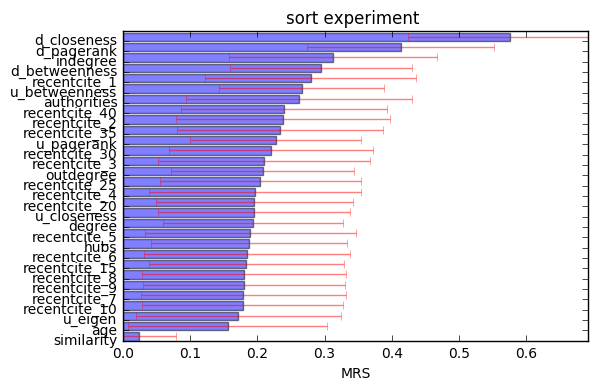

In [131]:
plot_scores(rankloss[exper][metric], title=exper, metric=metric)

In [183]:
to_compare = ['u_pagerank', 'outdegree']
exper = 'sort'
metric = 'MRS'
data = rankloss[exper][metric][to_compare]

print '%s vs. %s' % ( to_compare[0], to_compare[1])
print '%s experiment, %s' % (exper,metric)
print 'two sided t-test for equal means' 
print
print 'independent t-test'
print ttest_ind(data[to_compare[0]], data[to_compare[1]], equal_var=False)
print
print 'dependent paired samples'
print ttest_rel(data[to_compare[0]], data[to_compare[1]])

u_pagerank vs. outdegree
sort experiment, MRS
two sided t-test for equal means

independent t-test
Ttest_indResult(statistic=3.3815615230788216, pvalue=0.00073470224965585464)

dependent paired samples
Ttest_relResult(statistic=6.3642694585091952, pvalue=2.9847590174721341e-10)
